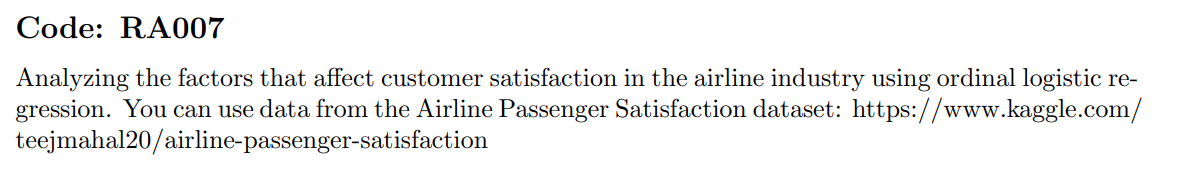

https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

**Exploratory Data Analysis (EDA)** 
*Airline Passenger Satisfaction*


Business Problem
To perform exploratory data analysis in order to find what affects the experience of airline passengers

<font size=5><font color=blue>**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import os

for dirname, _,filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname,filename))

# libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# mathplotlib inline
plt.style.use('bmh')
pd.options.display.float_format='{:.3f}'.format

In [2]:
df = pd.read_csv('test.csv')

<font size=5><font color=blue>**Data Information**

<font color = yellow>First 5 rows of dataset

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.000,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.000,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.000,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.000,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.000,satisfied


<font color = yellow>Last 5 rows of dataset

In [4]:
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.000,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.000,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.000,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.000,satisfied
25975,25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.000,neutral or dissatisfied


In [5]:
# Shape of the Dataframe
df.shape

(25976, 25)

This dataset has 1,29,880 rows and 24 columns

<font color = yellow>List of columns in the Dataframe

In [6]:
# List of columns in the Dataframe
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [7]:
# Number of Unique Values of all columns
df.nunique()

Unnamed: 0                           25976
id                                   25976
Gender                                   2
Customer Type                            2
Age                                     75
Type of Travel                           2
Class                                    3
Flight Distance                       3281
Inflight wifi service                    6
Departure/Arrival time convenient        6
Ease of Online booking                   6
Gate location                            5
Food and drink                           6
Online boarding                          6
Seat comfort                             5
Inflight entertainment                   6
On-board service                         6
Leg room service                         6
Baggage handling                         5
Checkin service                          5
Inflight service                         6
Cleanliness                              6
Departure Delay in Minutes             313
Arrival Del

In [8]:
# Understanding the content of all unique values
df.apply(lambda col: col.unique())

Unnamed: 0                           [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
id                                   [19556, 90035, 12360, 77959, 36875, 39177, 794...
Gender                                                                  [Female, Male]
Customer Type                                      [Loyal Customer, disloyal Customer]
Age                                  [52, 36, 20, 44, 49, 16, 77, 43, 47, 46, 33, 6...
Type of Travel                                      [Business travel, Personal Travel]
Class                                                        [Eco, Business, Eco Plus]
Flight Distance                      [160, 2863, 192, 3377, 1182, 311, 3987, 2556, ...
Inflight wifi service                                               [5, 1, 2, 0, 3, 4]
Departure/Arrival time convenient                                   [4, 1, 0, 3, 5, 2]
Ease of Online booking                                              [3, 2, 0, 4, 5, 1]
Gate location                              

In [10]:
# Find the sum of missing values in dataset
nof_missing = df.isnull().sum()
nof_missing

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [11]:
# creating a new column called total and storing the sorted list of missing values in descending order
total = nof_missing.sort_values(ascending=False)

In [12]:
# Create a new column called total and storing the sorted list of percentage of missing values
percent = (nof_missing/df.isnull().count()).sort_values(ascending=False)

In [13]:
# create a dictionary called missing which has total and percent as keys.
missing = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing

,Total,Percent
Arrival Delay in Minutes,83,0.003
Unnamed: 0,0,0.000
Online boarding,0,0.000
Departure Delay in Minutes,0,0.000
Cleanliness,0,0.000
Inflight service,0,0.000
Checkin service,0,0.000
Baggage handling,0,0.000
Leg room service,0,0.000
On-board service,0,0.000


It is not required to drop the missing values as it only consists of 0.003% of the dataset

<font color = yellow>Checking duplicate values

In [14]:
# Find duplicate rows in the dataframe
duplicate_row_df = df[df.duplicated()]
print('number of duplicate rows: {}'.format(duplicate_row_df.shape))

number of duplicate rows: (0, 25)


In [15]:
# Column name and their data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [16]:
# Checking statistics for columns of the int64, float64 and object datatype
df.describe(include=['int64'])

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
count,25976.000,25976.000,25976.000,25976.000,25976.000,25976.000,25976.000,25976.000,25976.000,25976.000,25976.000,25976.000,25976.000,25976.000,25976.000,25976.000,25976.000,25976.000,25976.000
mean,12987.500,65005.658,39.621,1193.788,2.725,3.047,2.757,2.977,3.215,3.262,3.449,3.358,3.386,3.350,3.633,3.314,3.649,3.286,14.306
std,7498.770,37611.527,15.136,998.684,1.335,1.533,1.413,1.282,1.332,1.356,1.320,1.338,1.282,1.319,1.177,1.269,1.181,1.319,37.423
min,0.000,17.000,7.000,31.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000
25%,6493.750,32170.500,27.000,414.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,3.000,3.000,3.000,2.000,0.000
50%,12987.500,65319.500,40.000,849.000,3.000,3.000,3.000,3.000,3.000,4.000,4.000,4.000,4.000,4.000,4.000,3.000,4.000,3.000,0.000
75%,19481.250,97584.250,51.000,1744.000,4.000,4.000,4.000,4.000,4.000,4.000,5.000,4.000,4.000,4.000,5.000,4.000,5.000,4.000,12.000
max,25975.000,129877.000,85.000,4983.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,1128.000


In [17]:
df.describe(include=['object'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,25976,25976,25976,25976,25976
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,13172,21177,18038,12495,14573


In [18]:
df.describe(include=['float64'])

,Arrival Delay in Minutes
count,25893.000
mean,14.741
std,37.518
min,0.000
25%,0.000
50%,0.000
75%,13.000
max,1115.000


In [19]:
# Checking for outliers
df_outlier = df.select_dtypes(exclude='object').columns.to_list()
df_outlier

['Unnamed: 0',
 'id',
 'Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [20]:
df_feature = df_outlier[0:5]
df_feature

['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service']

A new list of frist few attributes was created as the rest of the attributes are customer survey containing rating from 0-5


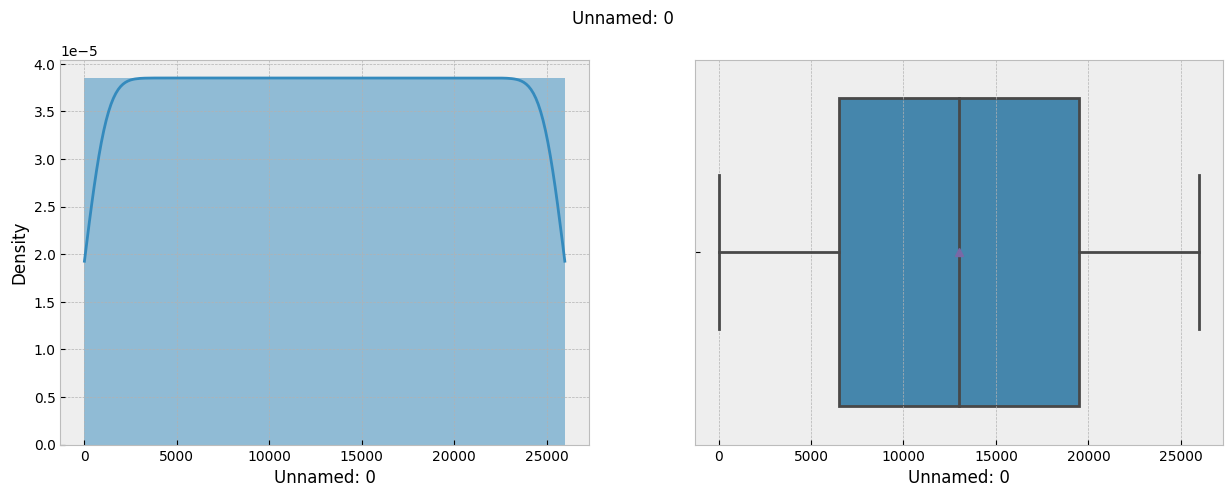

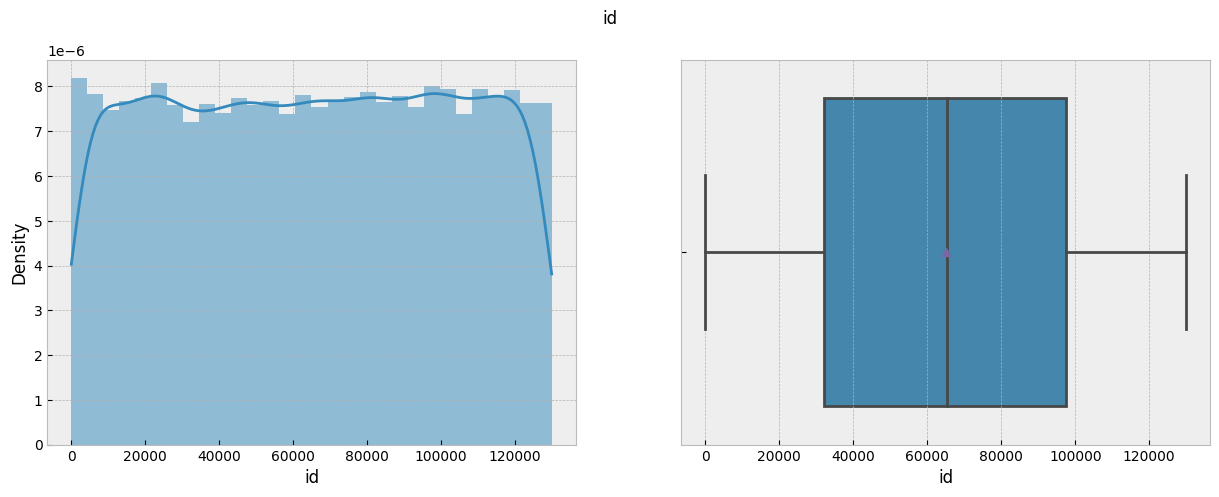

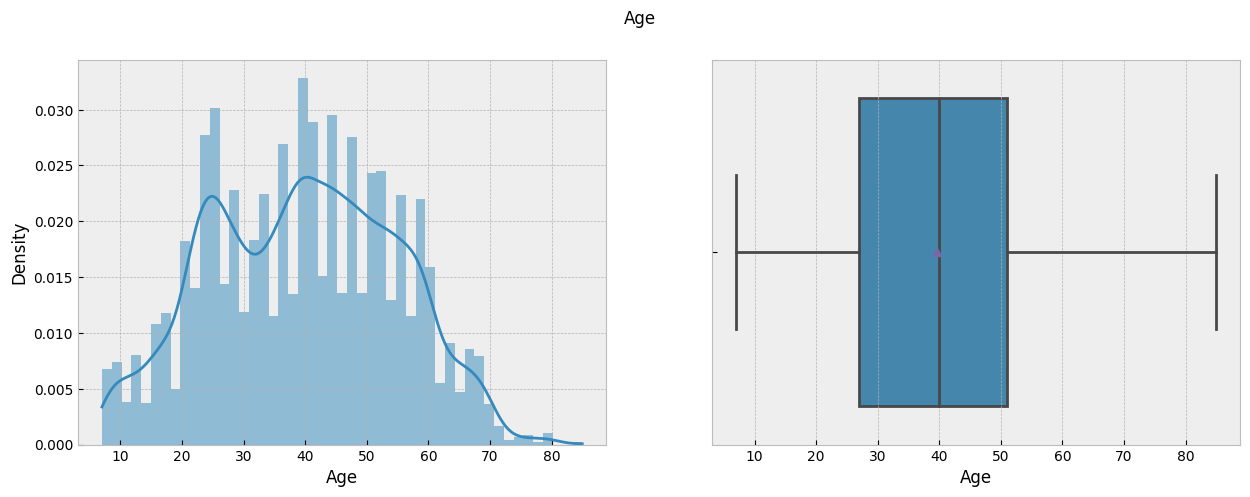

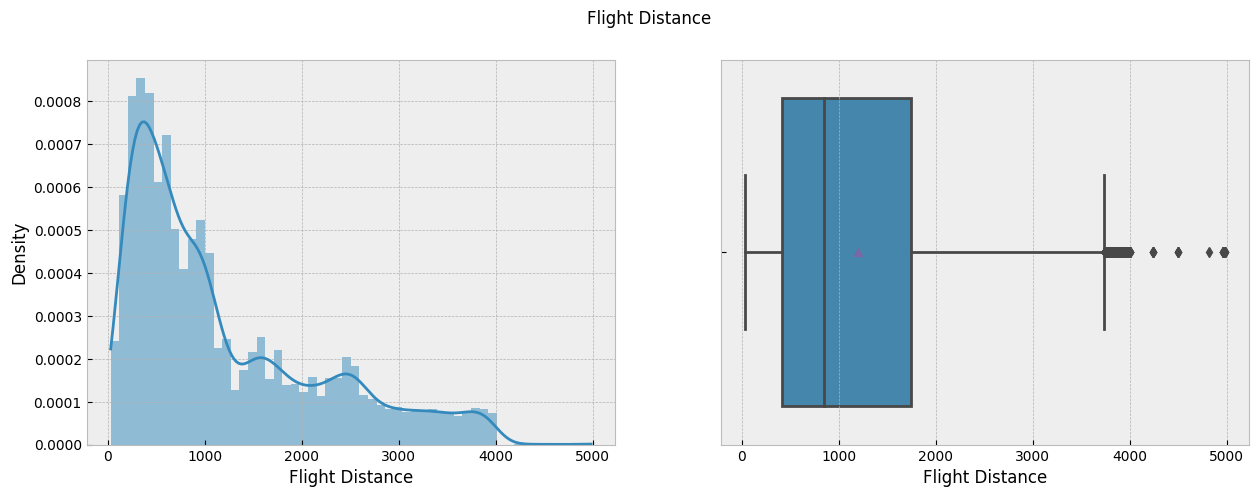

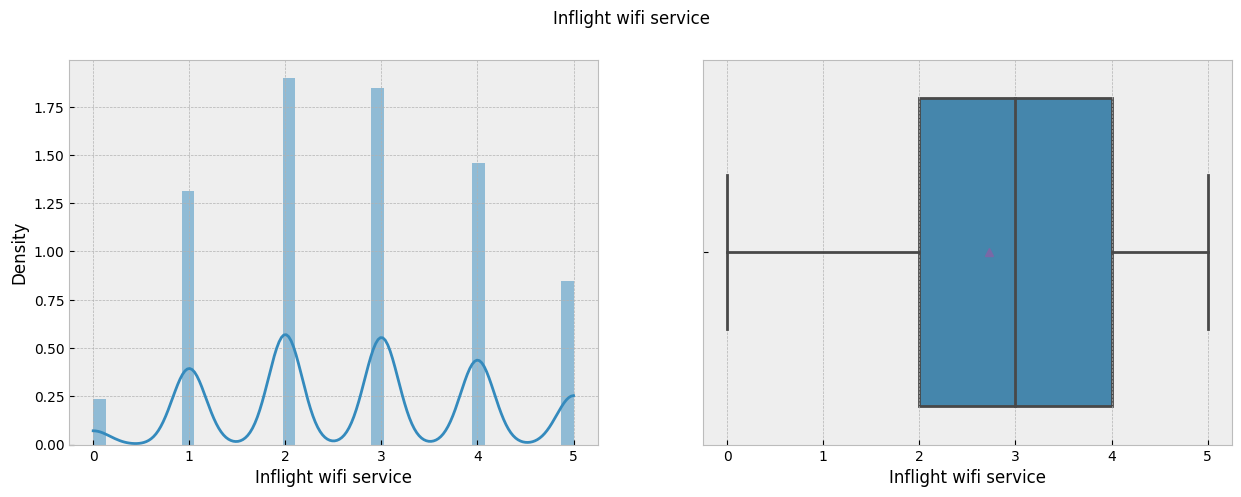

In [21]:
# Boxplot and Distribution plot
outl = df_feature
for x in outl:
  fig,axes = plt.subplots(1,2,figsize=(15,5))
  sns.histplot(x=df[x], ax=axes[0],kde=True,stat='density',linewidth=0)
  sns.boxplot(x=df[x],ax=axes[1], showmeans=True)
  fig.suptitle(x)

Observation: There are no outliers in ID and Age attribute but we can see some outliers in Flight Distance, Arrival Delay and Departure Delay.


C:\Users\LH\AppData\Local\Temp\ipykernel_1112\1101025490.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

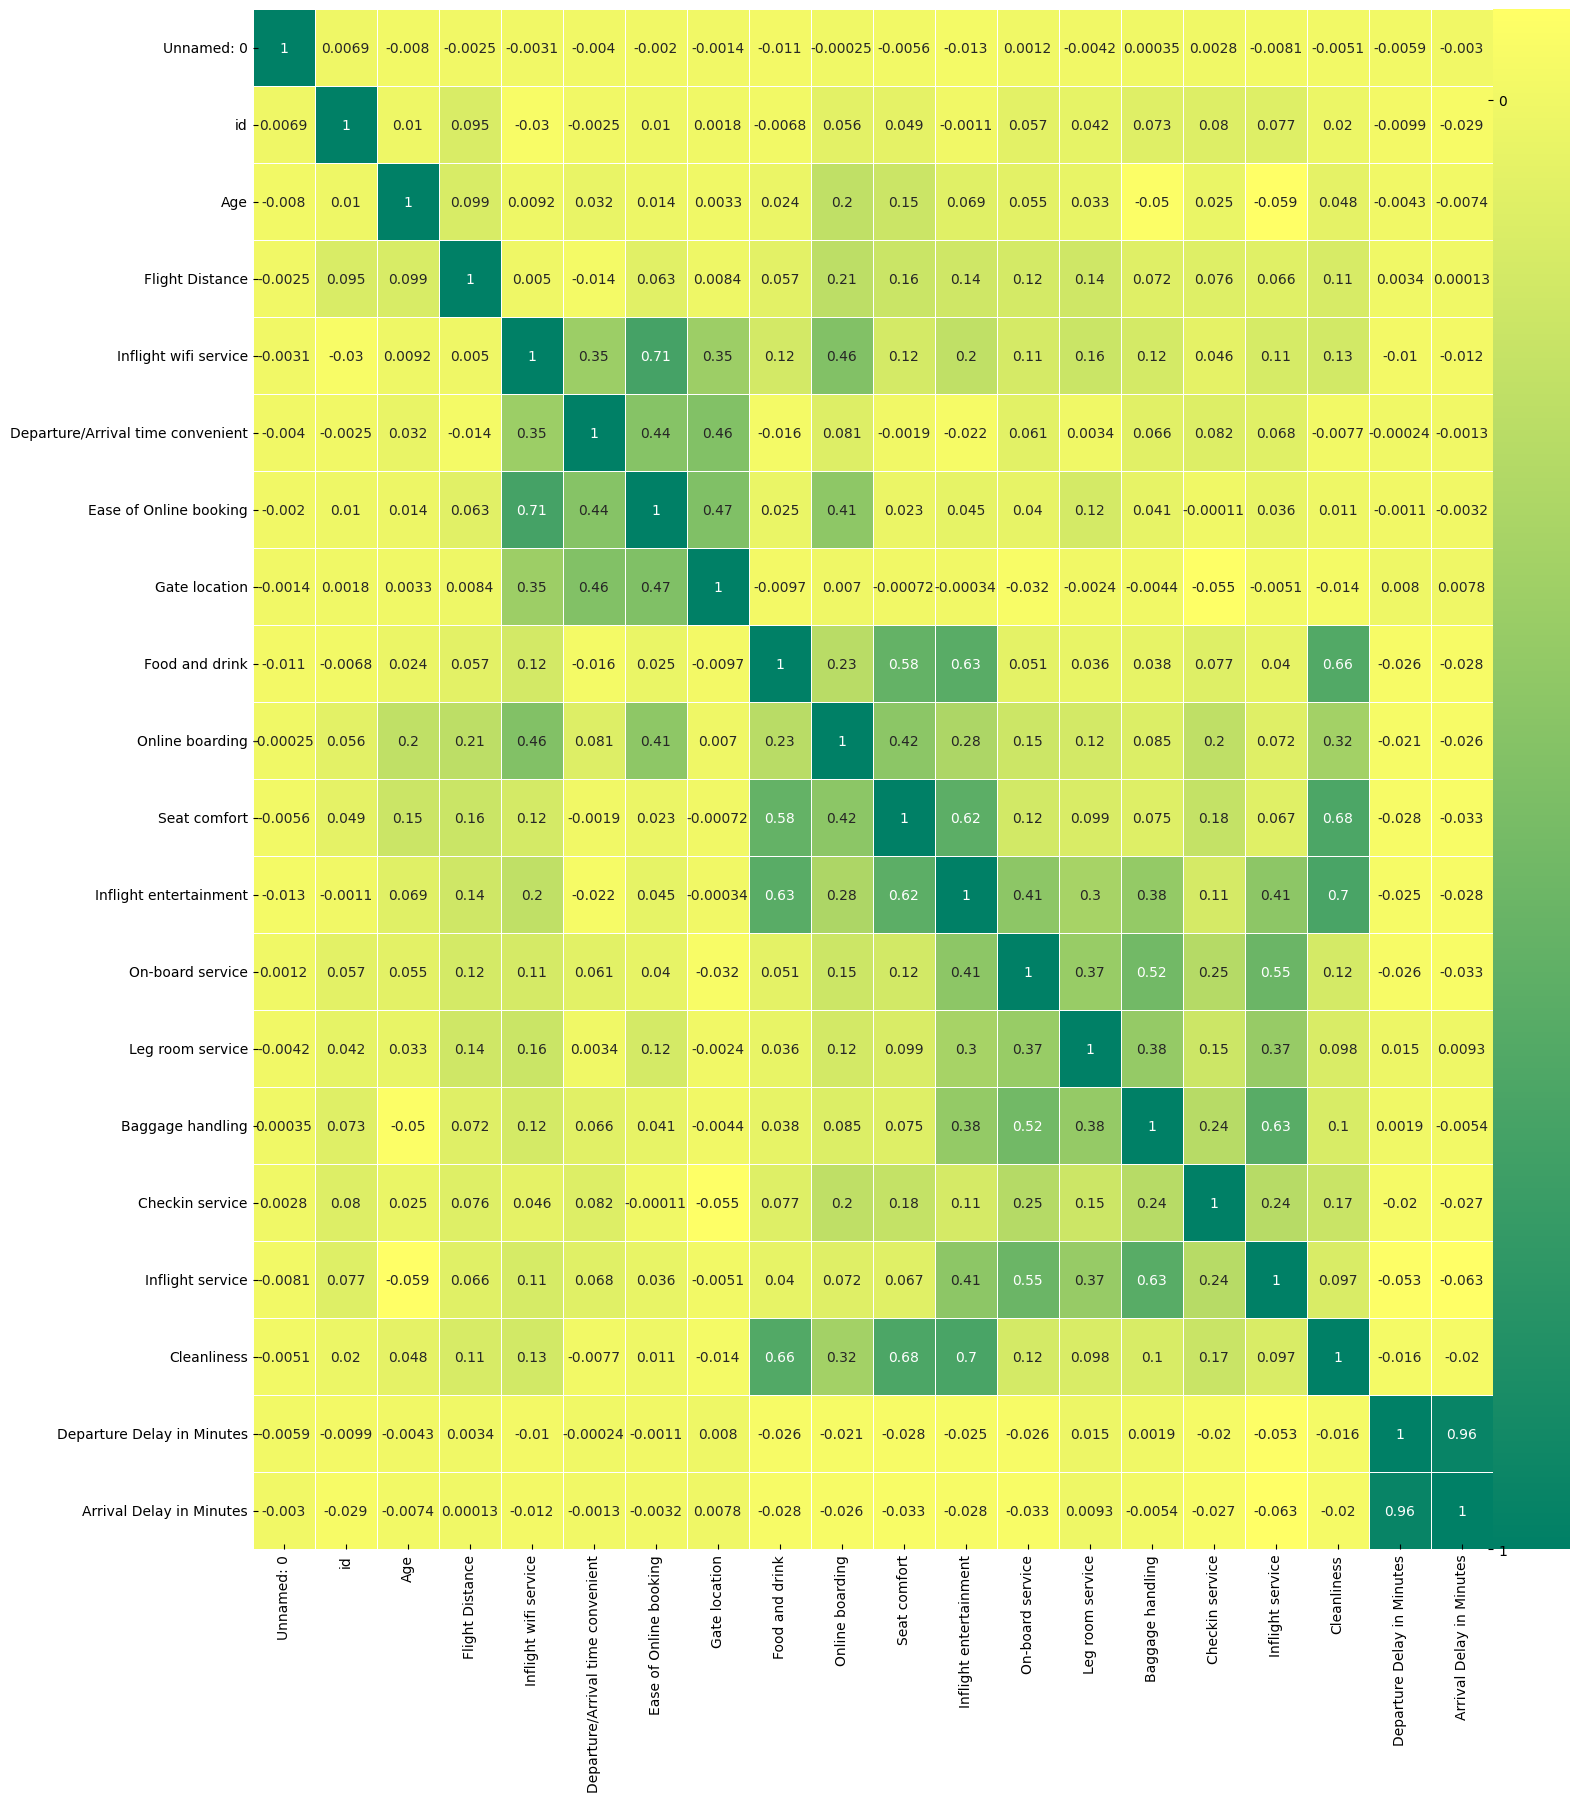

In [26]:
corr = df.corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='summer_r',linewidths=0.5,cbar_kws={"shrink":-1})

"Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service". Also "Arrival Delay" and "Departure Delay" are highly correlated too.But no pair is having correlation coefficient exactly equal to 1. So there is no perfect multicollinearity. Hence we are not discarding any variable.


<font size = 5><font color = blue>**Data Visualization**

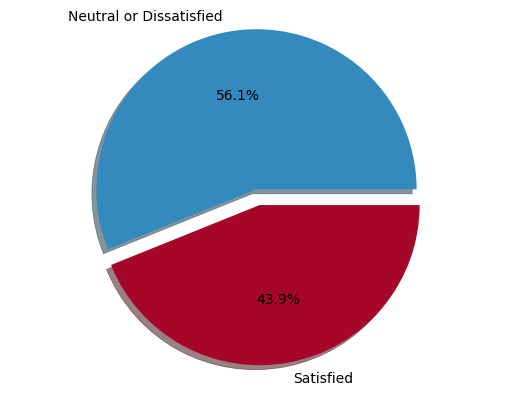

In [55]:
# Plotting a Pie Chart for satisfaction percentage
labels = ['Neutral or Dissatisfied','Satisfied']

sizes = [df['satisfaction'].value_counts()[0],
         df['satisfaction'].value_counts()[1]]

explode=[0.1,0]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
ax1.axis('equal')
plt.show()

Observation: 56.6% customers are neutral or dissatisfied with theservice provided by the airlines.

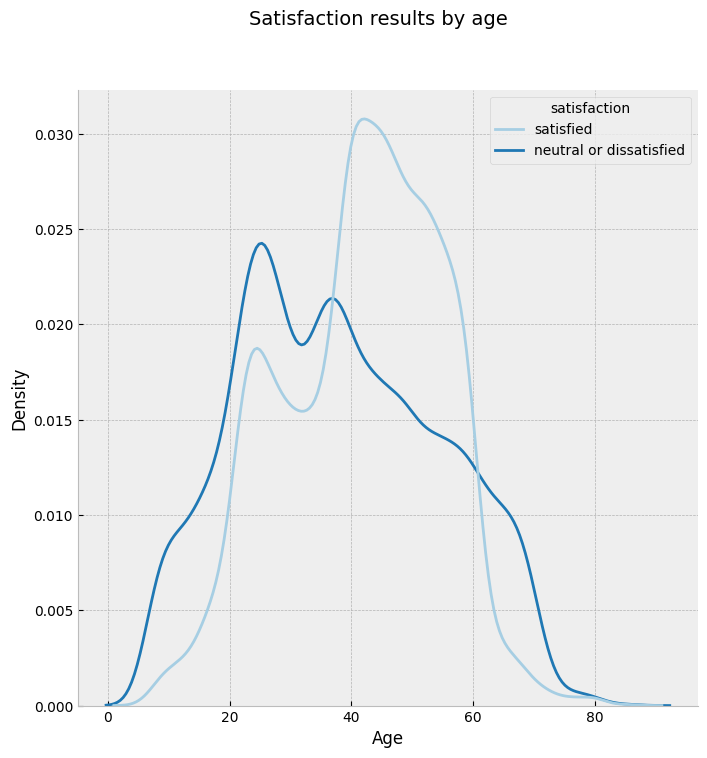

In [85]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=df,x='Age',hue='satisfaction',common_norm=False,palette='Paired')
plt.suptitle("Satisfaction results by age",fontsize=14)
sns.despine(top=True, right=True,left=False,bottom=False)
plt.show()

Observation: Average customer age is appoximately 40 years and customers between 40 to 60 years are most likely to find the service satisfactory.


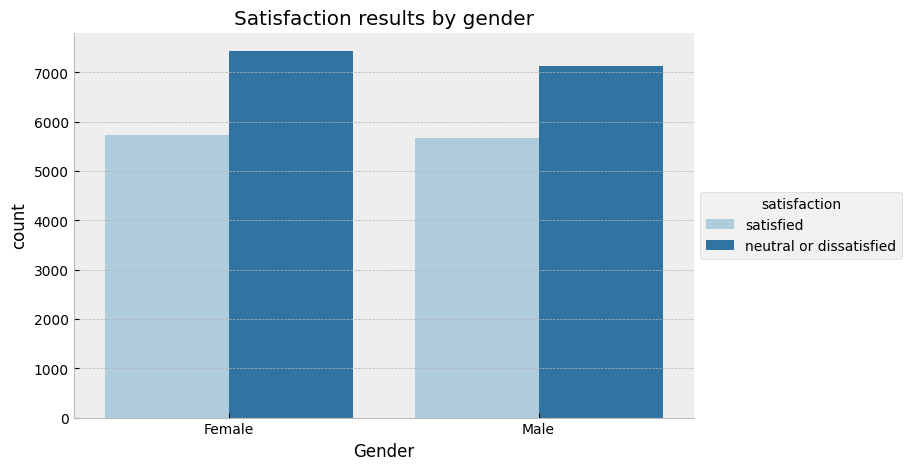

In [57]:
plt.figure(figsize = (8,5))
sns.countplot(x ="Gender", data = df, hue ="satisfaction", palette ="Paired" )

sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Satisfaction results by gender")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: Both the genders have almost the even rate of dissatisfaction with the services.


**Demography**

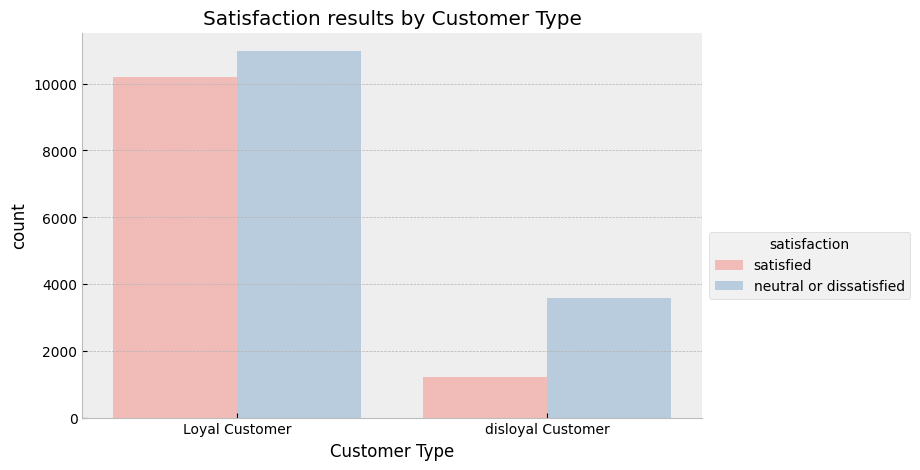

In [58]:
plt.figure(figsize = (8,5))
sns.countplot(x ="Customer Type", data = df, hue ="satisfaction",palette ="Pastel1" )
try:
  plt.title("Satisfaction results by Customer Type")
  sns.despine(top = True, right = True, left = False, bottom = False)
  plt.legend(loc='best', bbox_to_anchor=(1, 0.5),  title = "satisfaction")
except ValueError as e:
  print("Wrong legend location",e)
  plt.show()

Observation: Both the first time as well as the returning customers are not satisfied with the airline service.


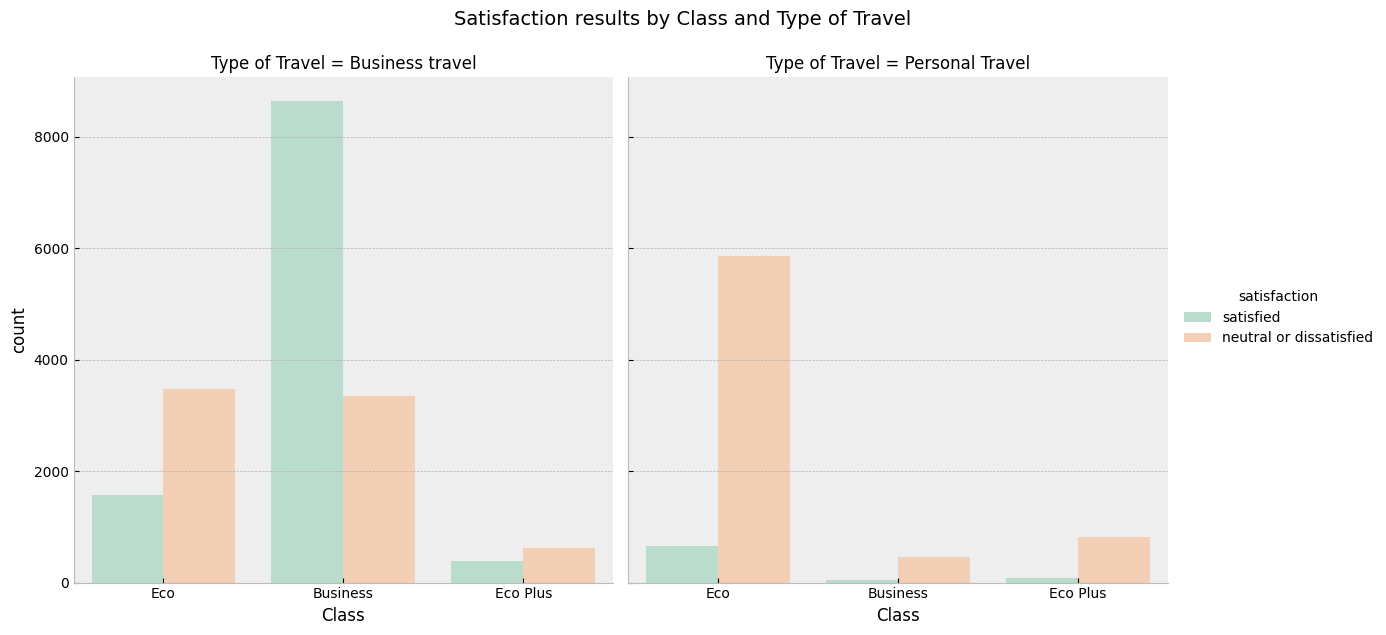

In [59]:
sns.catplot( x ="Class", hue ="satisfaction", kind = "count", col = "Type of Travel", 
            data = df ,palette ="Pastel2", height = 6)
plt.suptitle("Satisfaction results by Class and Type of Travel", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

Observation1: Passenger travelling for business purposes are more satisfied with the service as compared to people travelling for personal purposes.


Observation2: Business class passengers travelling for business purposes are satisfied with the services whereas economy class passengers travelling for personal purposes are highly dissatisfied.


<AxesSubplot: xlabel='Customer Type', ylabel='count'>

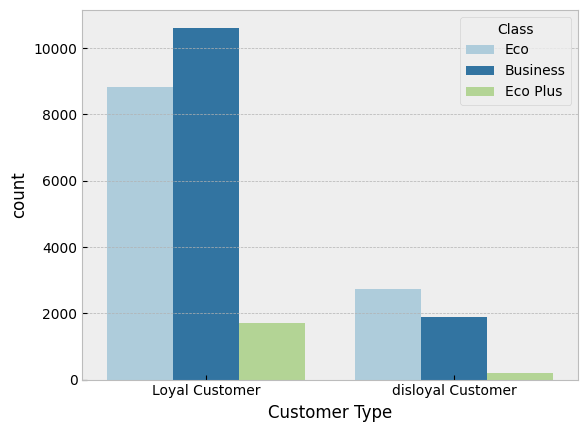

In [60]:
sns.countplot(x = 'Customer Type',  data = df, hue="Class",palette ="Paired")

Observation: Loyal/Returning passengers are mostly customers travelling through Business Class followed by Economy and Economy plus.


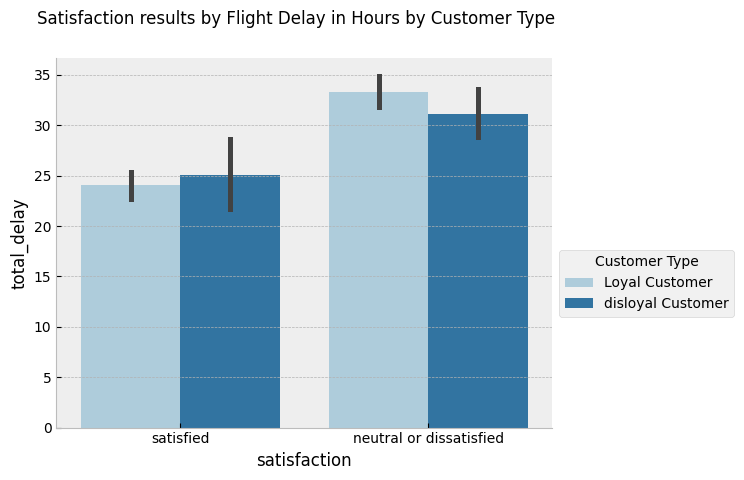

In [61]:
#Converting arrival and departure delay from minutes to hours for better interpretation.
df["Departure_delay_hr"] = round(df["Departure Delay in Minutes"]/60,1)
df["Arrival_delay_hr"] = round(df["Arrival Delay in Minutes"]/60,1).fillna(0)
delay = df[["Departure_delay_hr","Arrival_delay_hr"]]
df['total_delay']= df['Arrival Delay in Minutes']+ df["Departure Delay in Minutes"]
sns.barplot(x = 'satisfaction',  data = df,y="total_delay", hue="Customer Type",palette ="Paired")
plt.suptitle("Satisfaction results by Flight Delay in Hours by Customer Type")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5),  title = "Customer Type")
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

Observation: Returning passengers are more dissatisfied with the delay in flights than first time passengers.


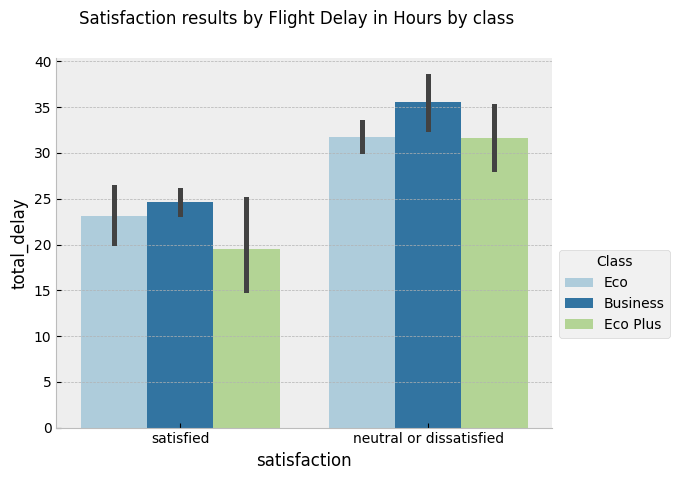

In [62]:
sns.barplot(x = 'satisfaction',  data = df,y="total_delay", hue="Class",palette ="Paired")
plt.suptitle("Satisfaction results by Flight Delay in Hours by class")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5),  title = "Class")
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

Observation: Passengers travelling from all classes are dissatisfied but Business Class people are more dissatisfied.


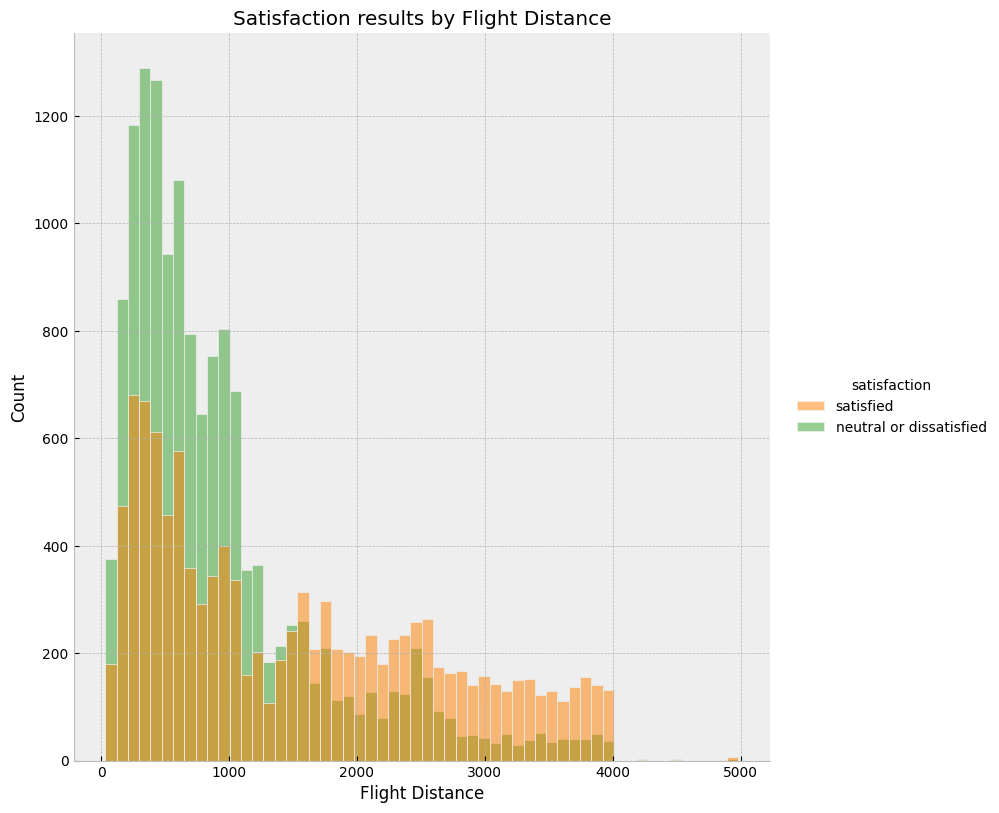

In [63]:
sns.displot(x = "Flight Distance", data = df, hue ="satisfaction", height = 8,palette ="Paired_r"  )
plt.title("Satisfaction results by Flight Distance")
plt.show()

Observation: Passengers flying in long distance flights are more satisfied whereas passengers travelling for short distance are highly dissatisfied.


**Services**

Ease of Online Booking

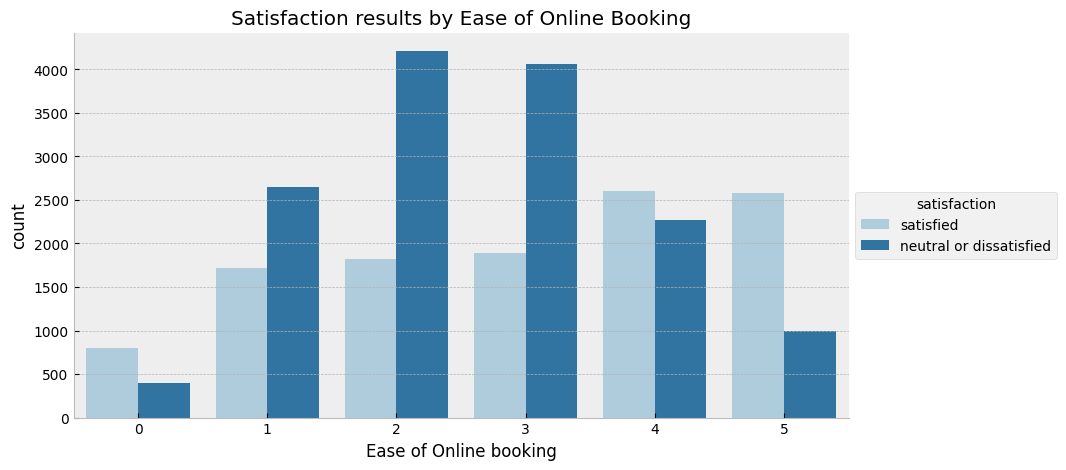

In [64]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Ease of Online booking", data = df, hue ="satisfaction",palette ="Paired" )

plt.title("Satisfaction results by Ease of Online Booking")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: The overall satisfaction increases as the rating increases which means people who were overall satisfied with the booking service were likely to rate overall service satisfactory.


Check-in Service

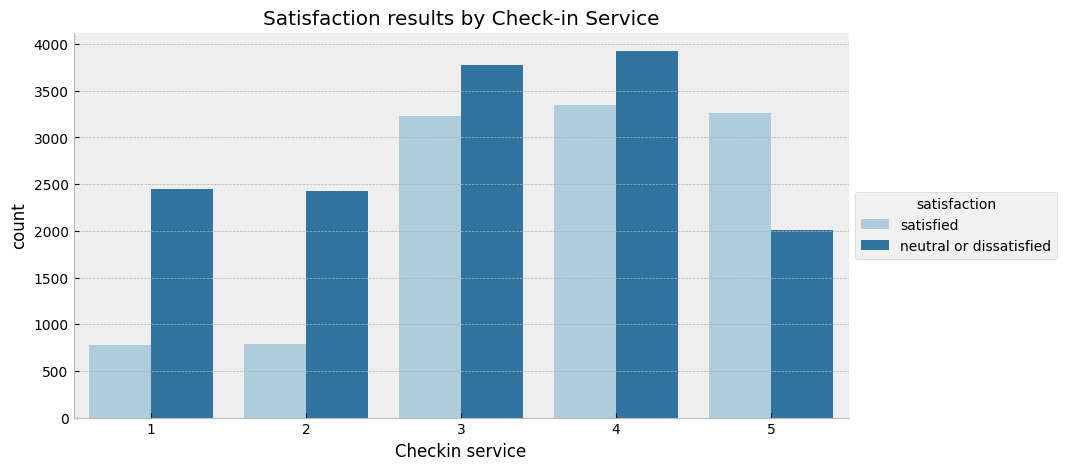

In [65]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Checkin service", data = df, hue ="satisfaction",palette ="Paired" )

plt.title("Satisfaction results by Check-in Service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: Check-in Service has overall less impact on overall satisfaction, as even on score 4 passengers have rated dissatisfaction

Online Boarding

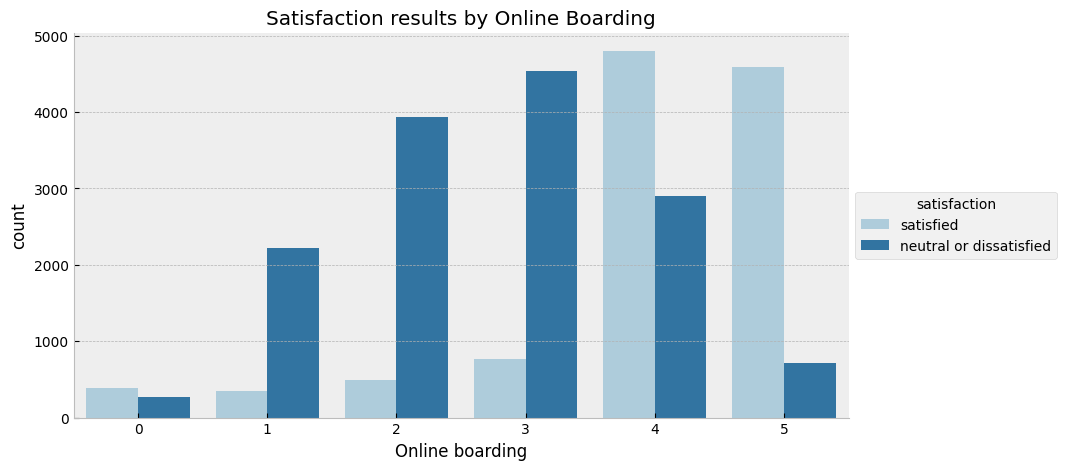

In [66]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Online boarding", data = df, hue ="satisfaction",palette ="Paired" )

plt.title("Satisfaction results by Online Boarding")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: As the scores for online bookings increase, the overall dissatisfaction appears to decrease. 


Seat Comfort


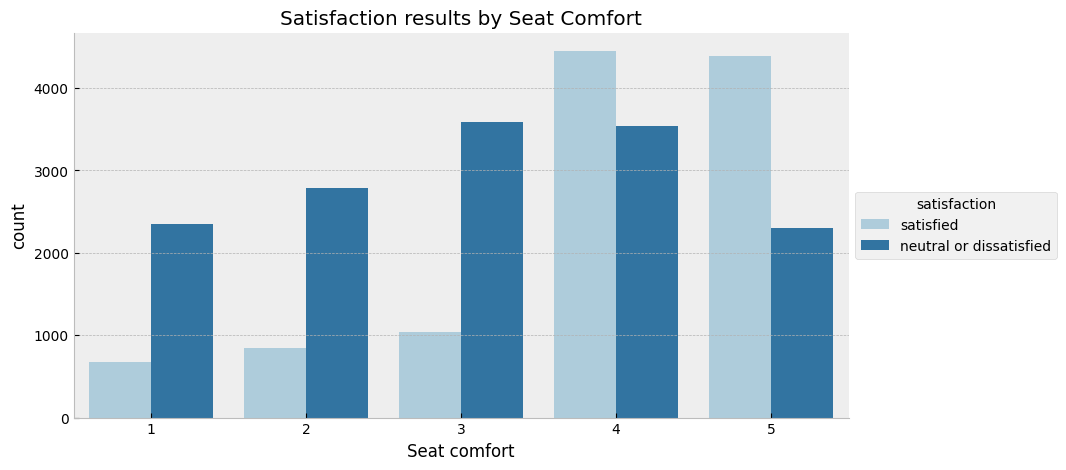

In [67]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Seat comfort", data = df, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Seat Comfort")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: As the rating increases the overall dissatisfaction also decreases, people who voted overall seats extremely comfortable also voted the overall services satisfactory.


Leg Room Service

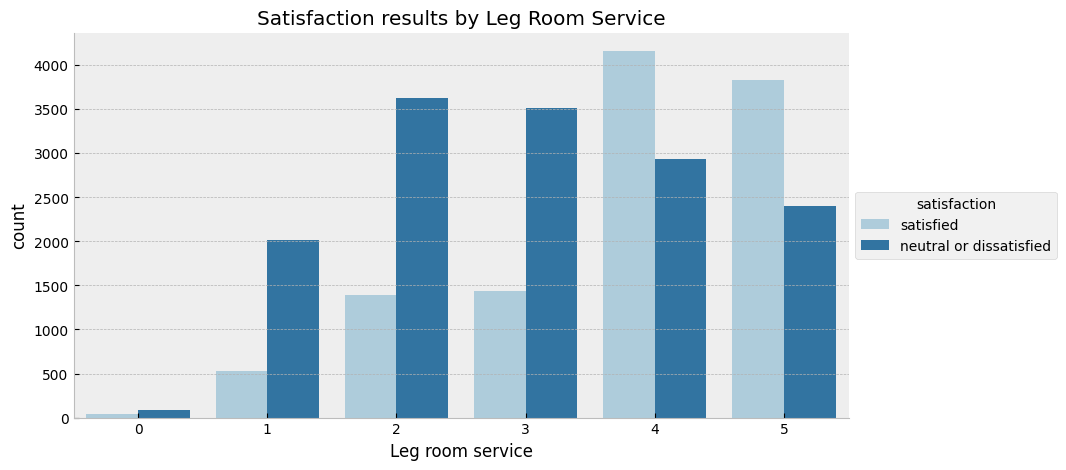

In [68]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Leg room service", data = df, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Leg Room Service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: Follows a similar pattern as Seat Comfort

Cleanliness

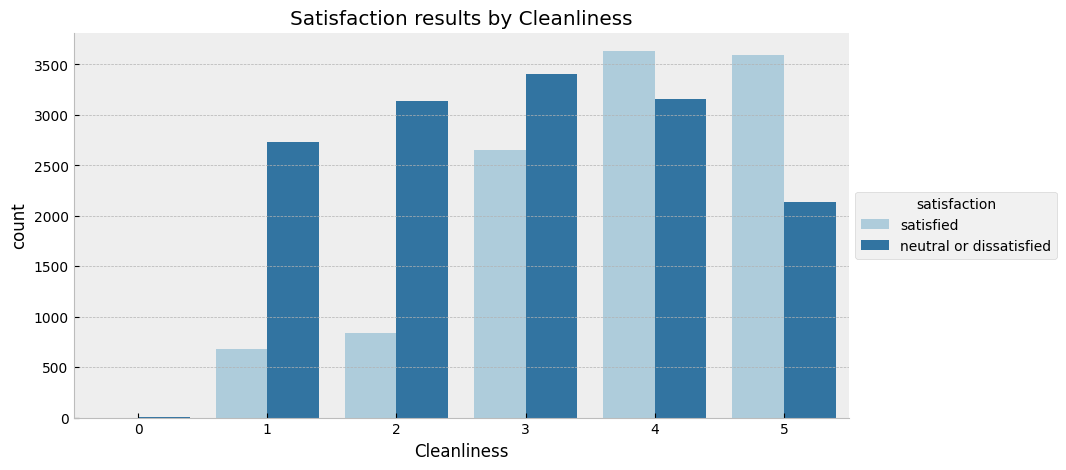

In [69]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Cleanliness", data = df, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Cleanliness")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: While cleanliness is important it is not a critical factor defining the satisfaction of the people.


Food and Drink

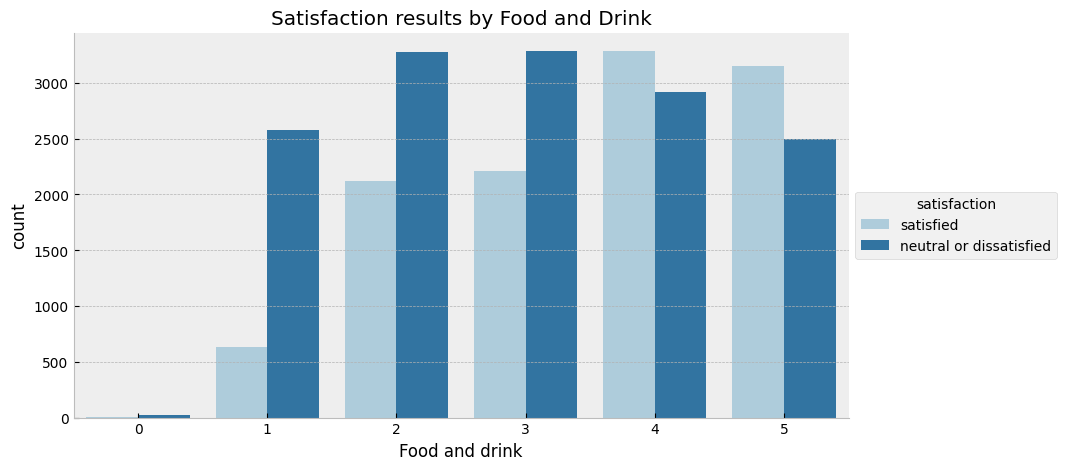

In [70]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Food and drink", data = df, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Food and Drink")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: Increased ratings shows a decrease in the overall dissatisfaction of the service, but not too impactful.


In-flight Service

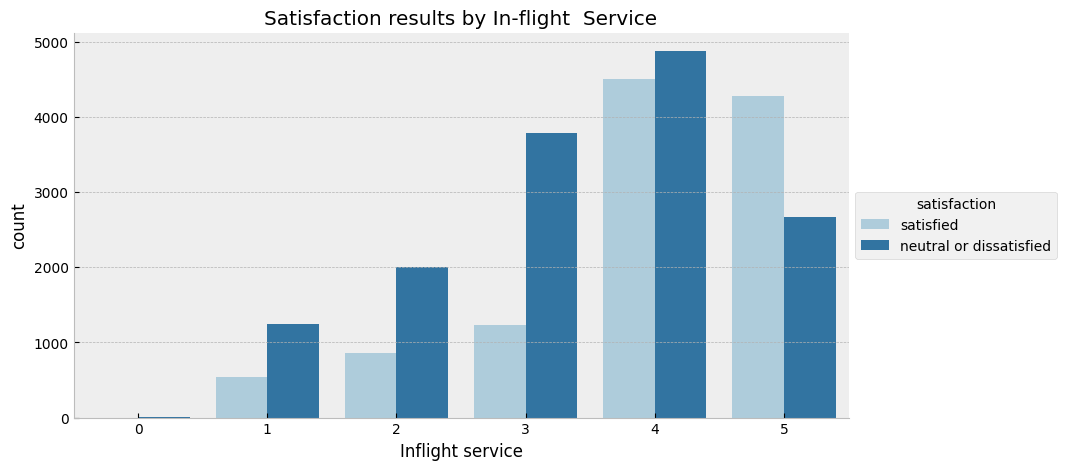

In [71]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Inflight service", data = df, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by In-flight  Service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction") 

plt.show()

Observation: A similar trend can be seen as the seat comfort and leg room service, as the experience gets better the customers are more satisfied


In-flight Wifi Service

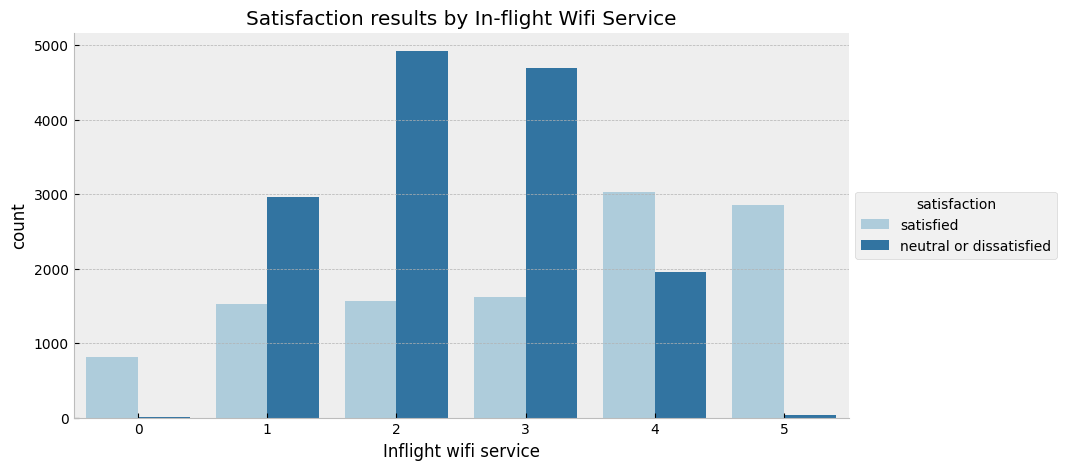

In [72]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Inflight wifi service", data = df, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by In-flight Wifi Service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: As the rating increases the dissatisfaction completely drps and a huge drop can be seen from 3/4.


In-flight Entertainment

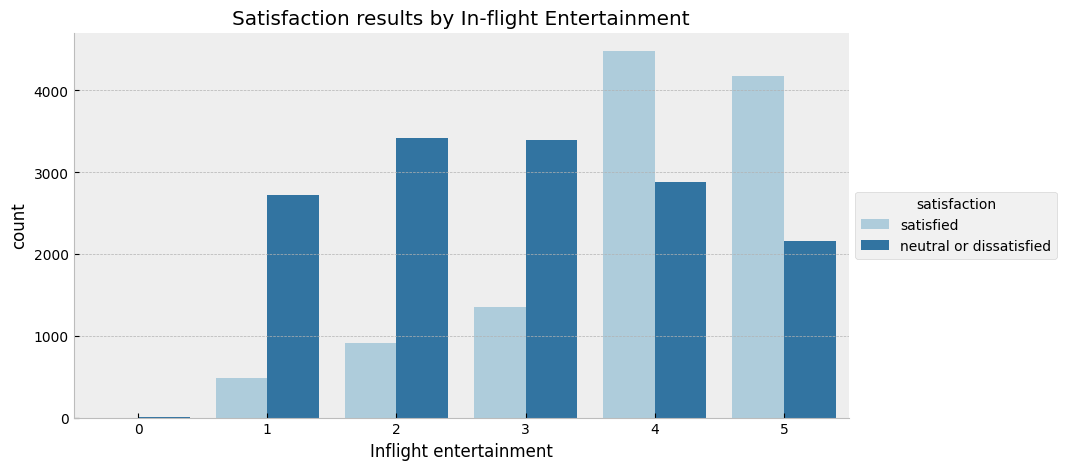

In [73]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Inflight entertainment", data = df, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by In-flight Entertainment")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: This service also follows a similar trend to seat comfort services


Baggage Handling

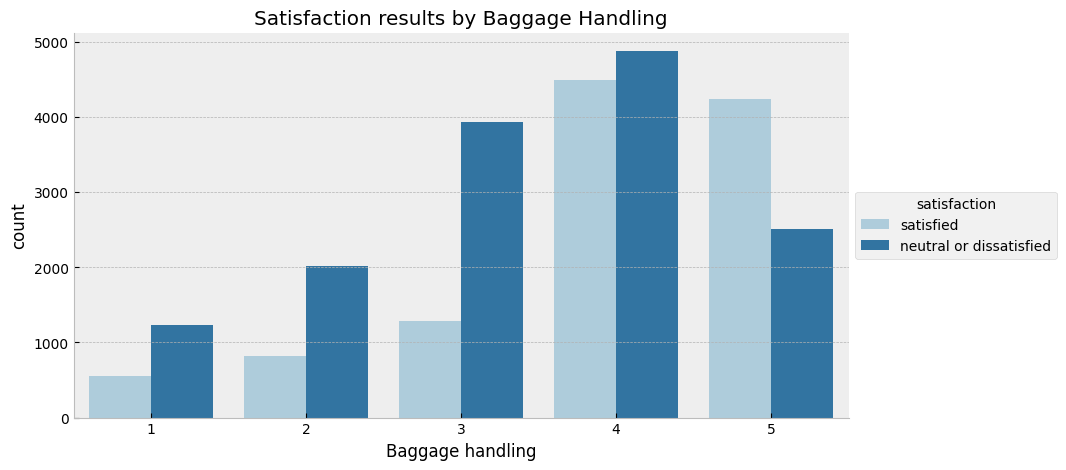

In [74]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Baggage handling", data = df, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Baggage Handling")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()


Observation: A similar trend can be seen, as the rating increases the dissatisfaction decreases.


Few Important services to look into as per our business problem.

Inflight Wifi Service

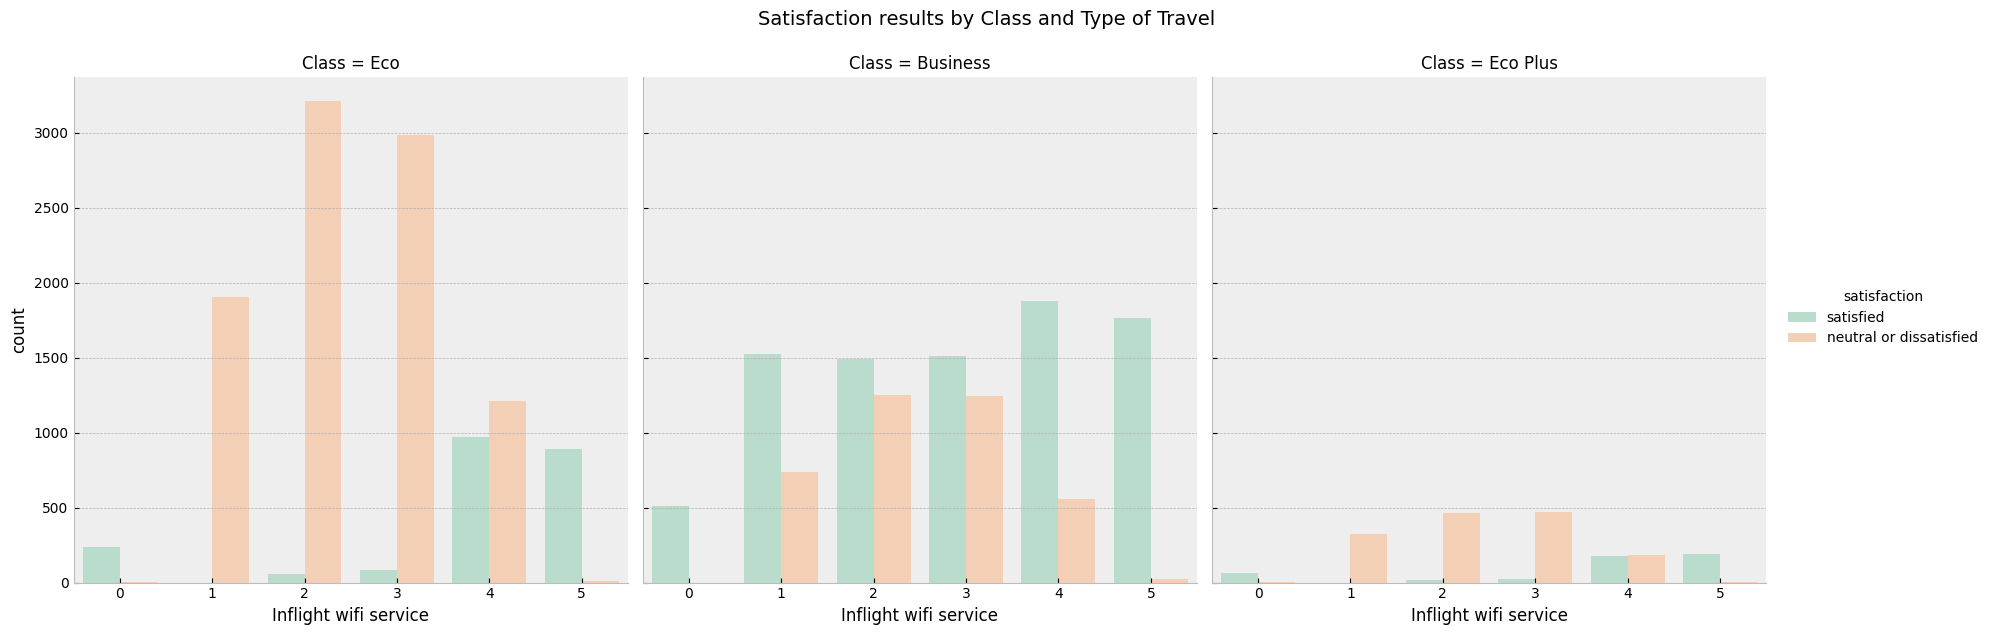

In [75]:
sns.catplot( x ="Inflight wifi service", hue ="satisfaction", kind = "count", col = "Class", 
            data = df ,palette ="Pastel2", height = 6)
plt.suptitle("Satisfaction results by Class and Type of Travel", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

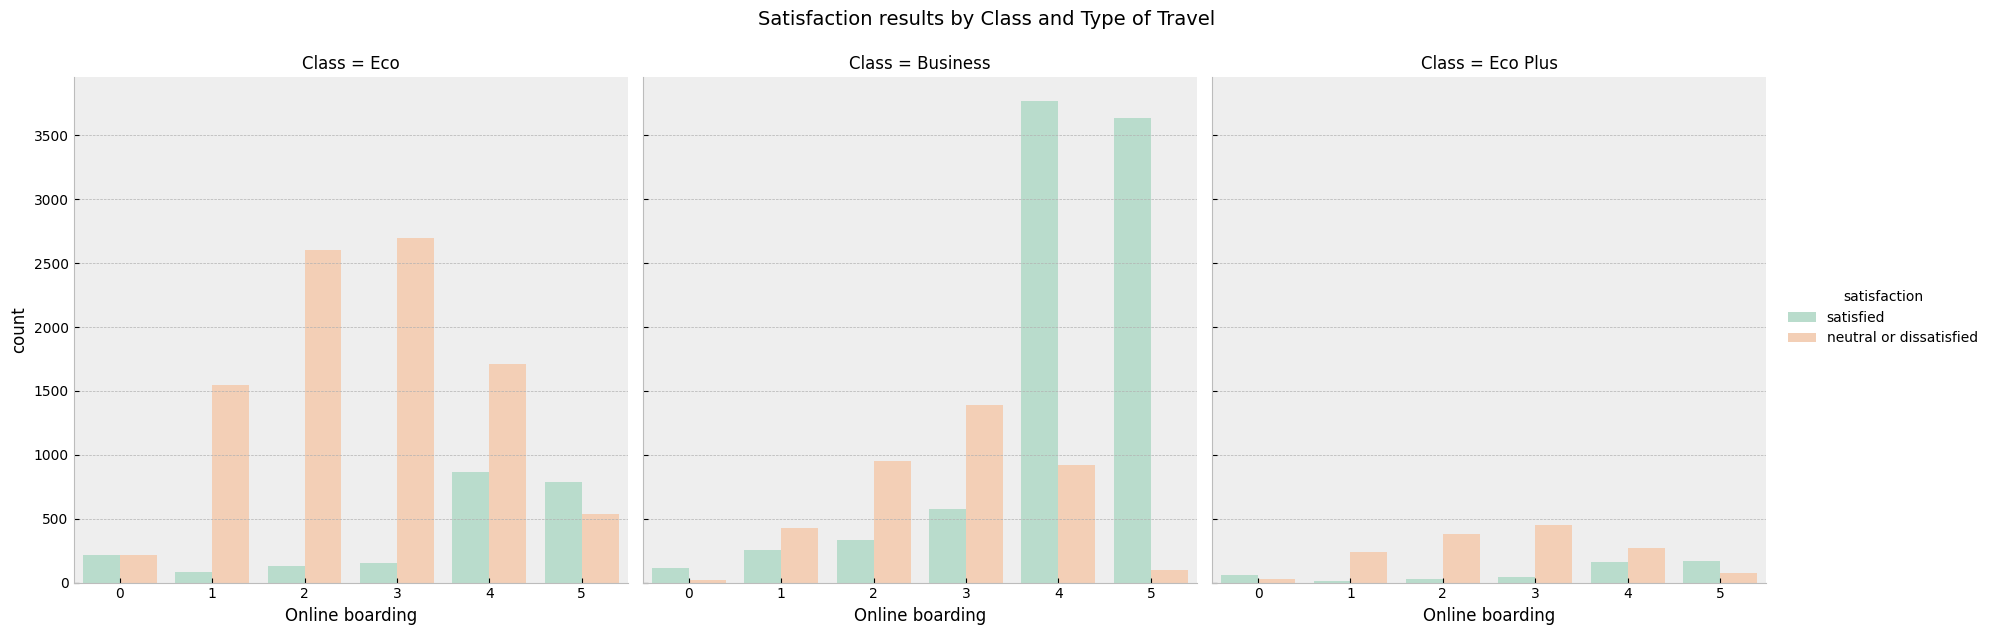

In [76]:
sns.catplot( x ="Online boarding", hue ="satisfaction", kind = "count", col = "Class", 
            data = df ,palette ="Pastel2", height = 6)
plt.suptitle("Satisfaction results by Class and Type of Travel", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

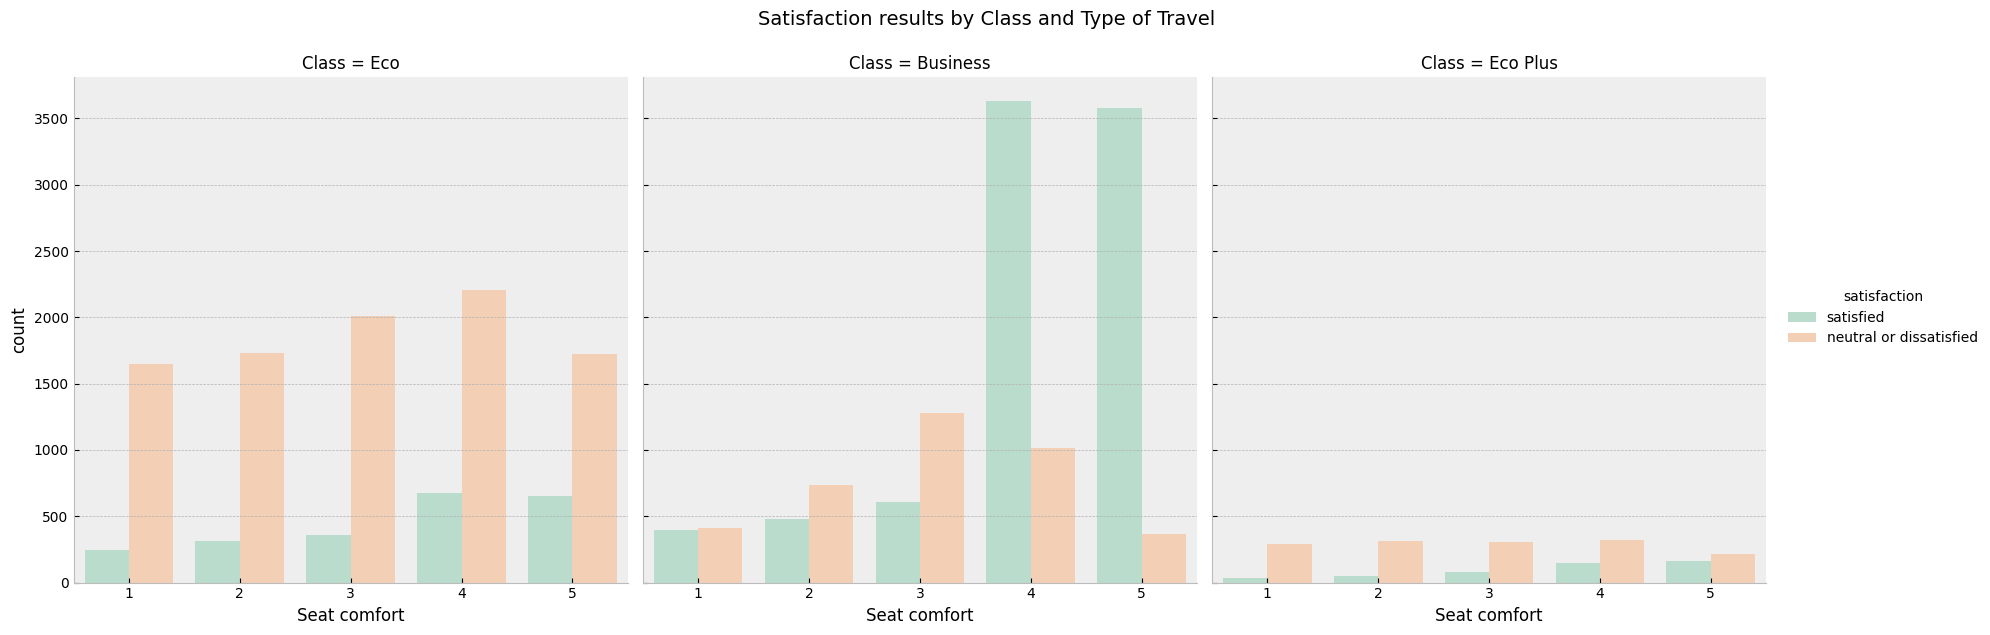

In [77]:
sns.catplot( x ="Seat comfort", hue ="satisfaction", kind = "count", col = "Class", 
            data = df ,palette ="Pastel2", height = 6)
plt.suptitle("Satisfaction results by Class and Type of Travel", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

In [78]:
# Few parameters were collected into a list called external factors and the total percent score was evaluated
external_facts=df[['Ease of Online booking','Gate location', 'Online boarding', 'Departure/Arrival time convenient','Checkin service','Baggage handling']]
df["Total_escore"] = external_facts.sum(axis = 1)
max_score = len(external_facts.columns)*6
df["Total_escore_percent"] = round((df["Total_escore"]/max_score)*100,1)

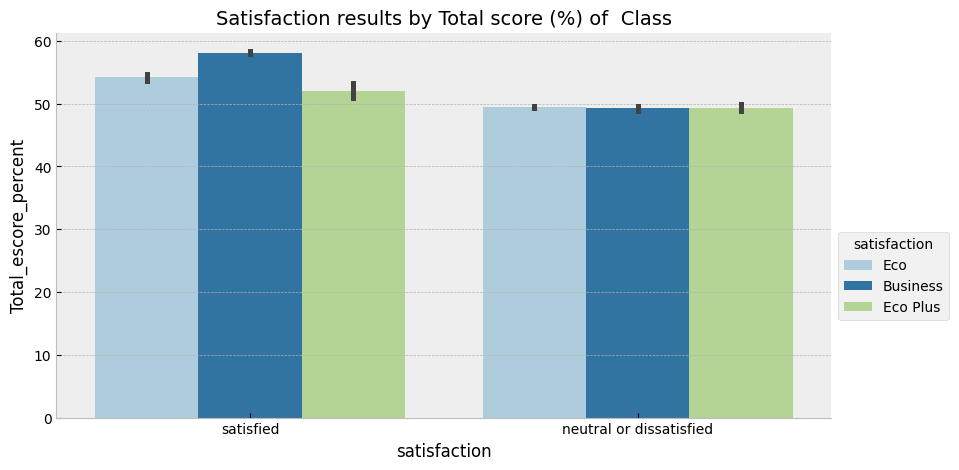

In [79]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'satisfaction',  data = df,y="Total_escore_percent", hue="Class",palette ="Paired")
plt.title("Satisfaction results by Total score (%) of  Class", fontsize = 14)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='best',bbox_to_anchor=(1, 0.5), title = "satisfaction")
plt.show()

Observation: Overall, passengers are satisfied with the external factors with people flying Business class being 59% satisfied.


In [80]:
internal_facts=df[['On-board service',
 'Seat comfort',
 'Leg room service',
 'Cleanliness',
 'Food and drink',
 'Inflight service',
 'Inflight wifi service',
 'Inflight entertainment']]
df["Total_iscore"] = internal_facts.sum(axis = 1)
max_score = len(internal_facts.columns)*8
df["Total_iscore_percent"] = round((df["Total_iscore"]/max_score)*100,1)

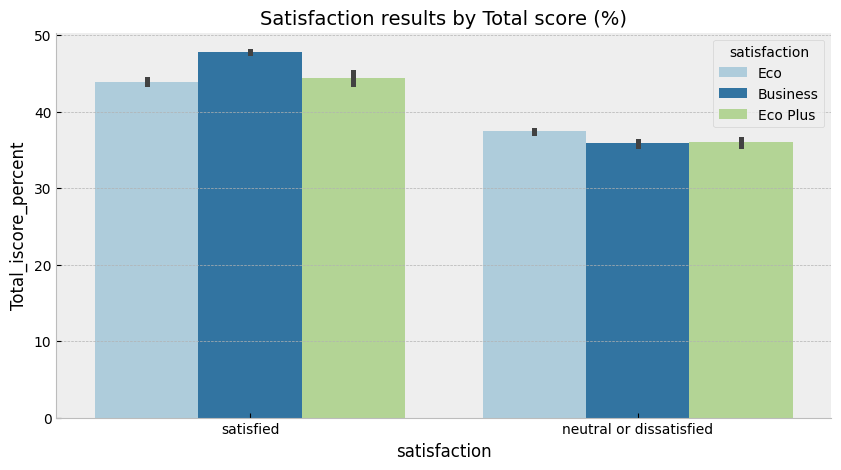

In [81]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'satisfaction',  data = df,y="Total_iscore_percent", hue="Class",palette ="Paired")
plt.title("Satisfaction results by Total score (%)", fontsize = 14)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='best', title = "satisfaction")
plt.show()